# Exploration et analyse de données via Pandas

<table>
<tr>
    <td><img src="./images/pandas.png" alt="Pandas Logo" width="400"/></td>
    <td><img src="./images/seaborn.svg" alt="Seaborn Logo" width="400"/></td>
</tr>
</table>


Aperçu du jeu de données diamonds:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

Informations sur le jeu de données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8 

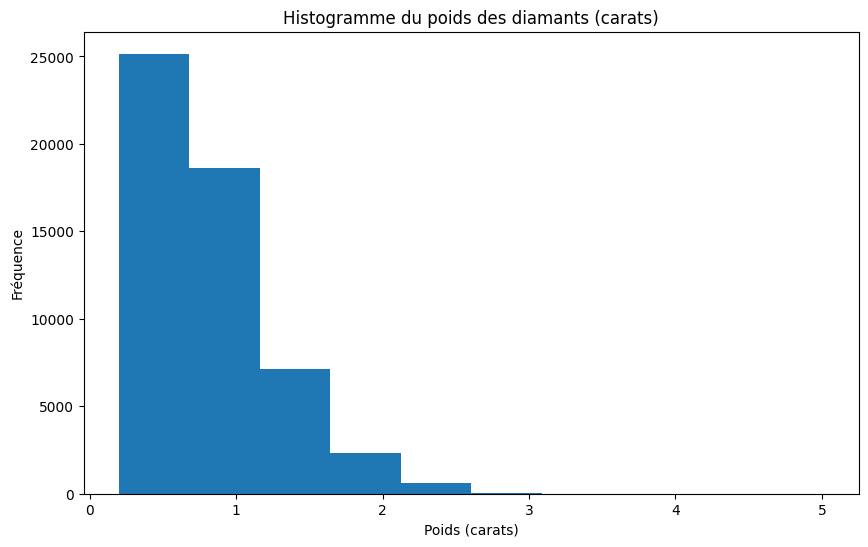

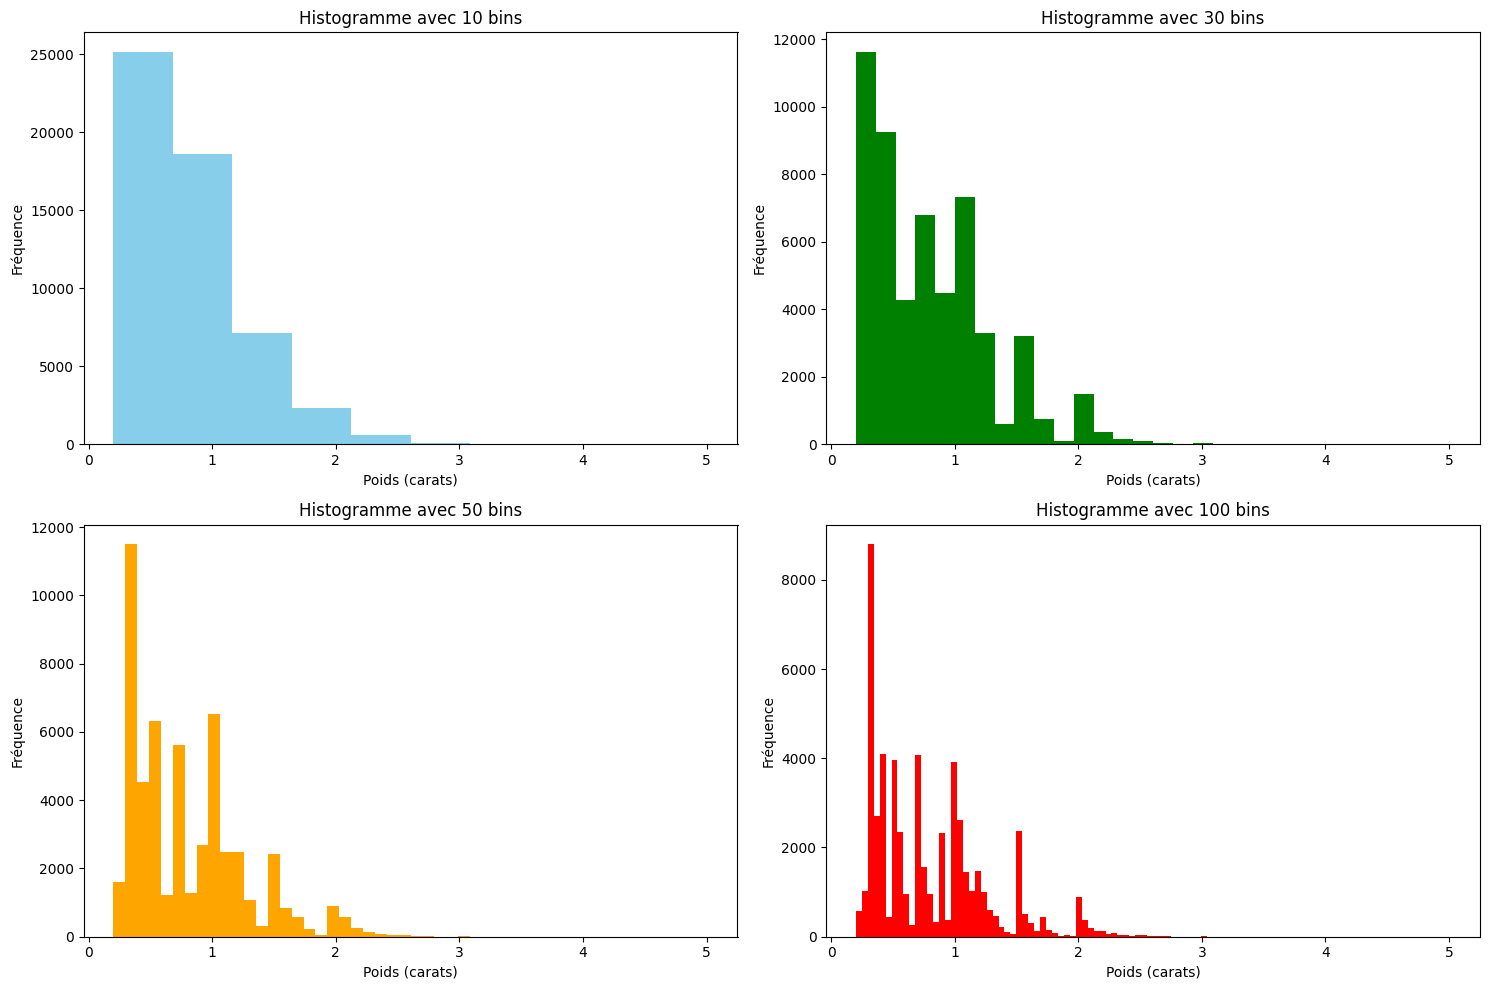

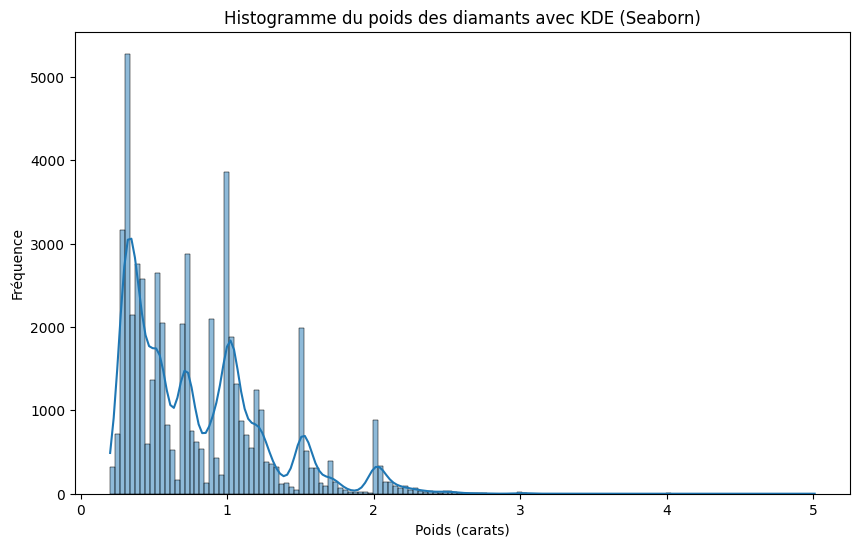

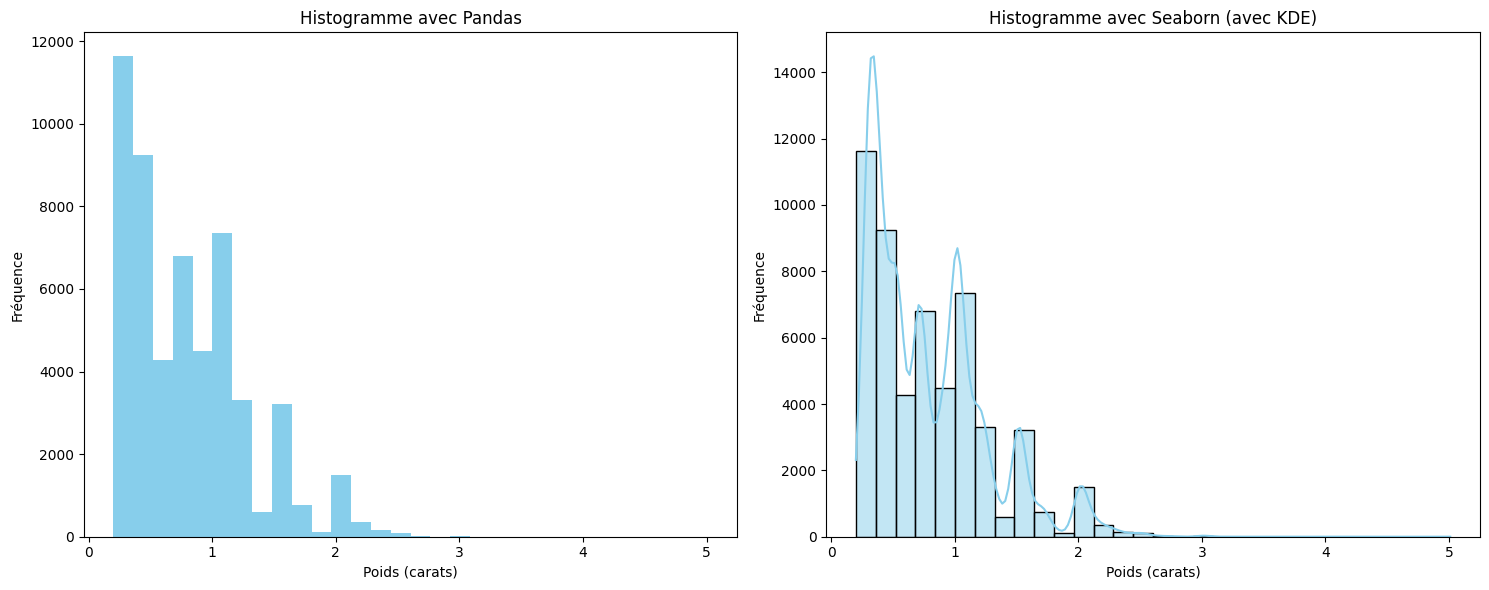

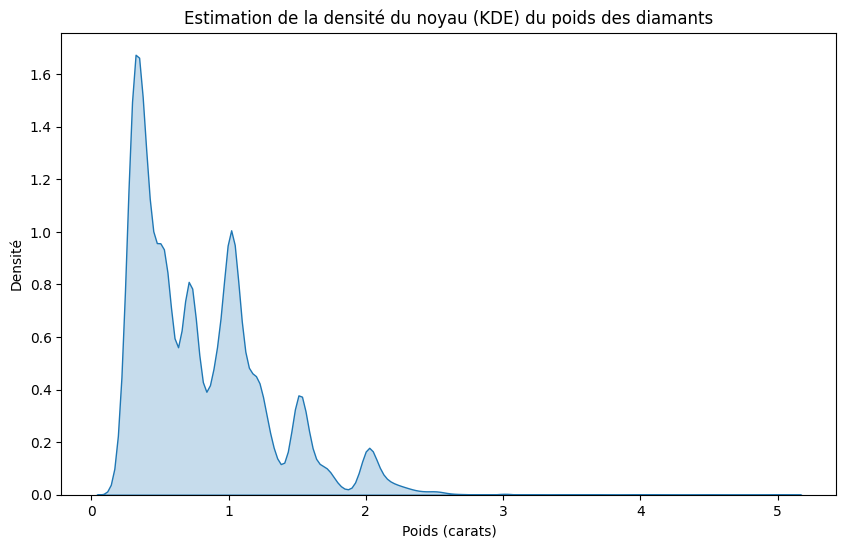

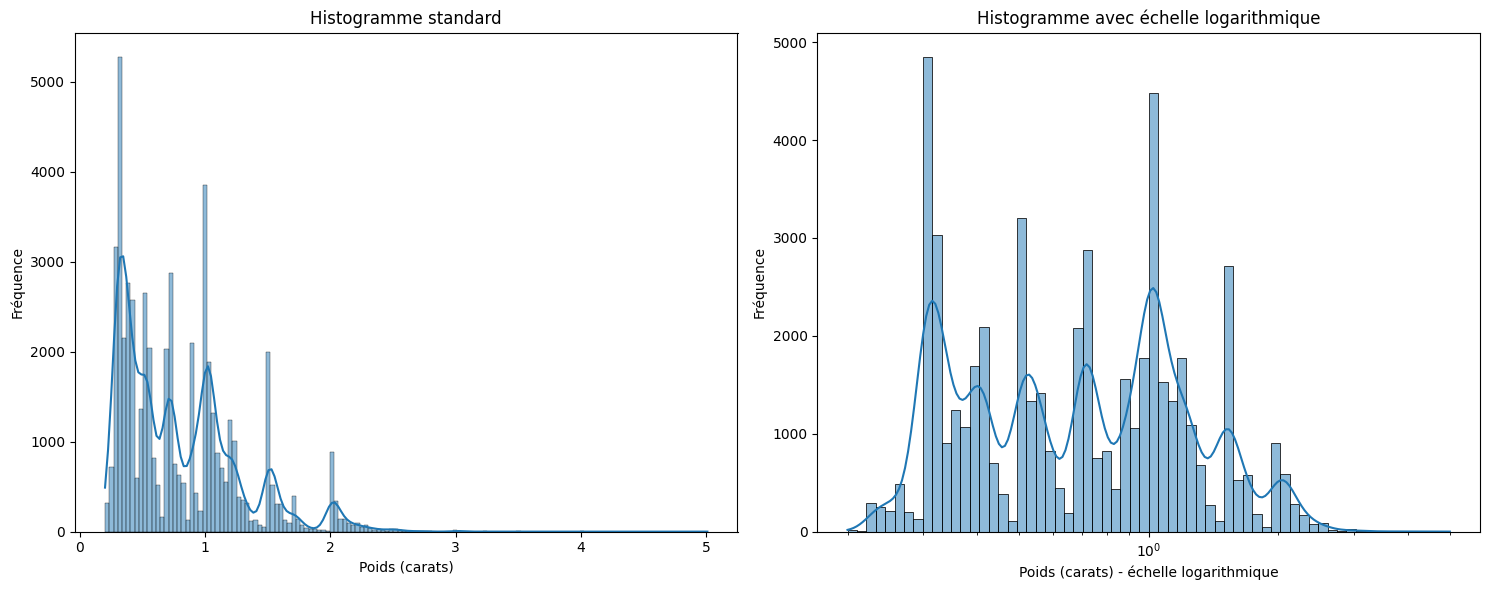

Aperçu du jeu de données diamonds:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

Statistiques descriptives de la colonne 'price':
count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64


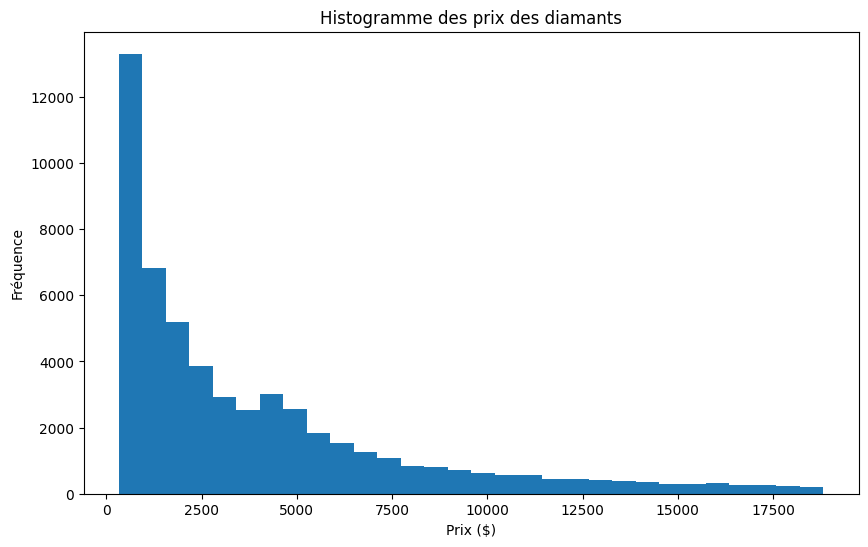

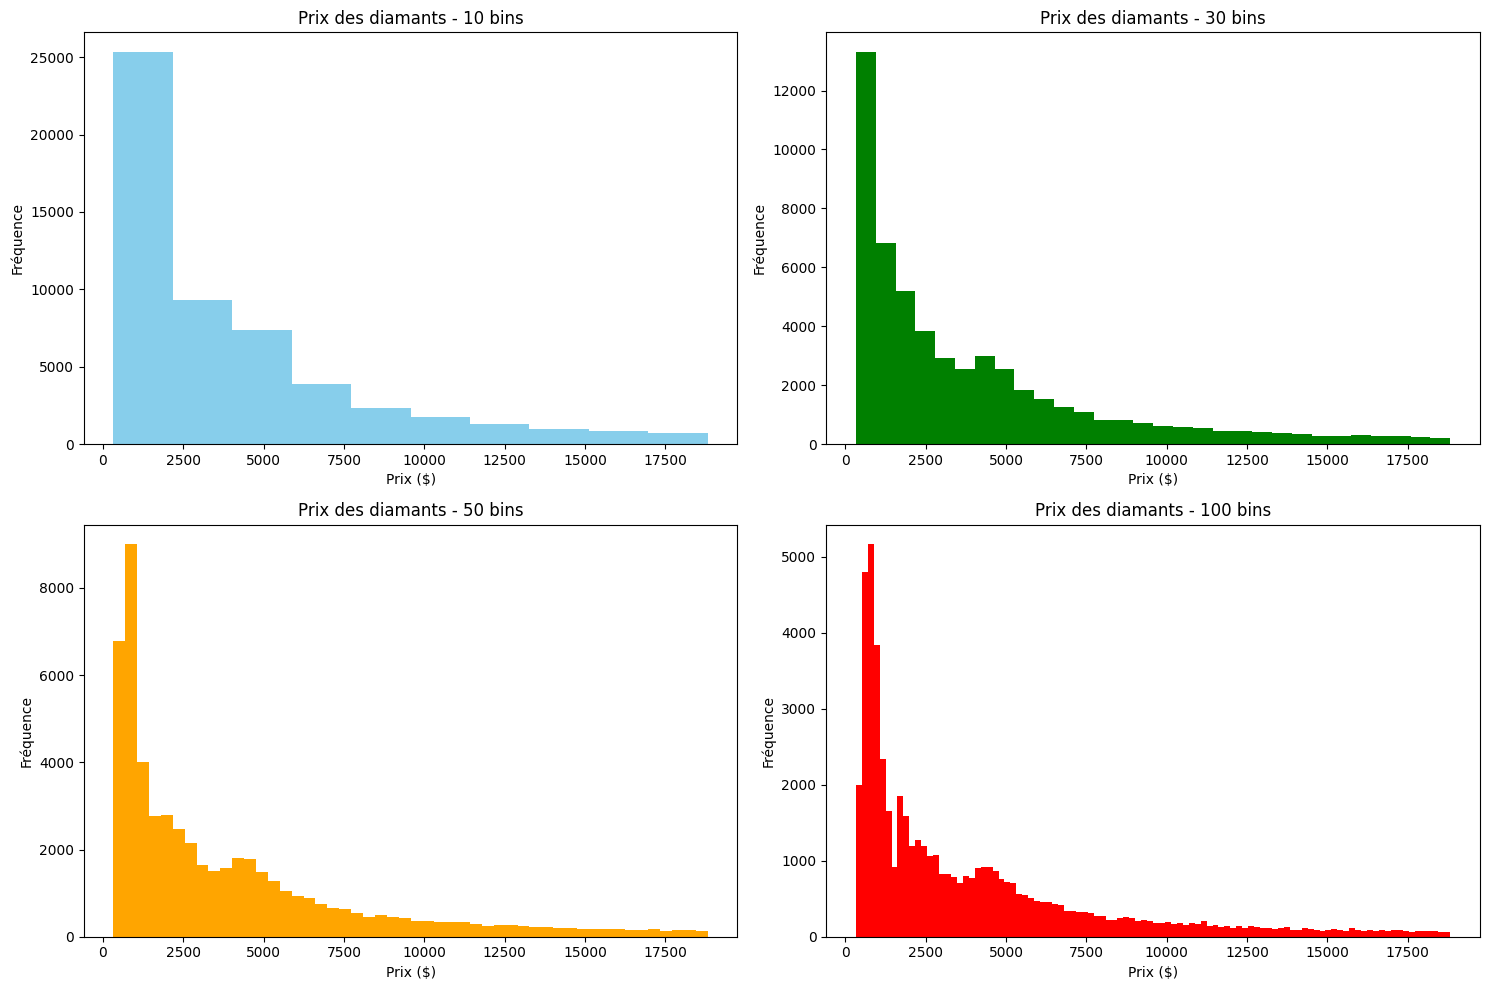

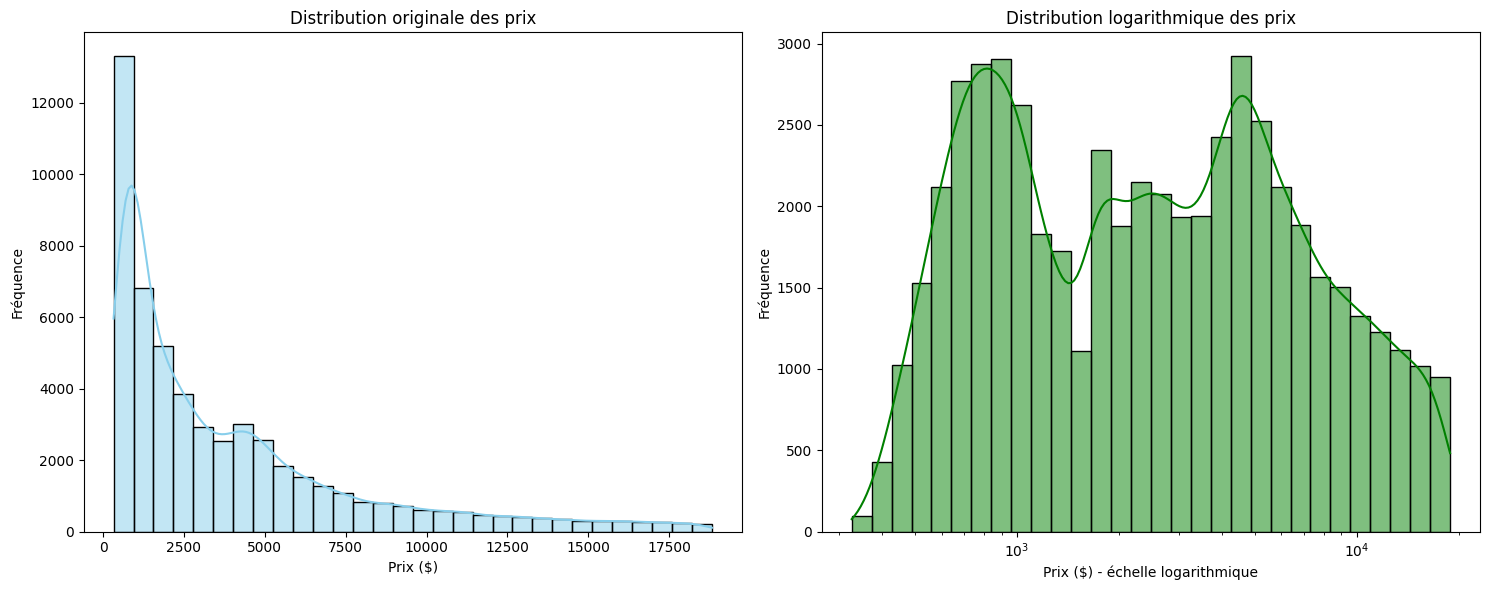

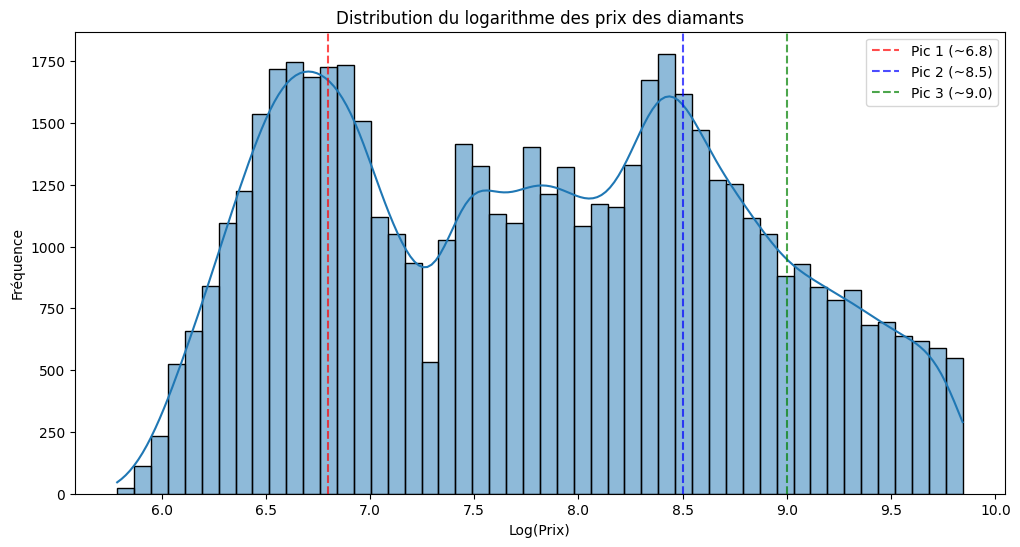


Pics identifiés sur l'échelle logarithmique et leurs prix correspondants:
Log(Prix) = 6.8 correspond à Prix = $897.85
Log(Prix) = 8.5 correspond à Prix = $4914.77
Log(Prix) = 9.0 correspond à Prix = $8103.08

Caractéristiques des diamants autour du pic 1 (prix entre $812.41 et $992.27):
         carat    price
count  4231.00  4231.00
mean      0.36   899.06
std       0.06    52.28
min       0.24   813.00
25%       0.32   854.00
50%       0.35   898.00
75%       0.41   945.00
max       0.72   992.00

Caractéristiques des diamants autour du pic 2 (prix entre $4447.07 et $5431.66):
         carat    price
count  4052.00  4052.00
mean      1.06  4902.30
std       0.12   282.37
min       0.56  4448.00
25%       1.00  4661.00
50%       1.03  4883.00
75%       1.12  5147.00
max       2.15  5431.00

Caractéristiques des diamants autour du pic 3 (prix entre $7331.97 et $8955.29):
         carat    price
count  2321.00  2321.00
mean      1.30  8100.24
std       0.25   485.18
min       0.83  733

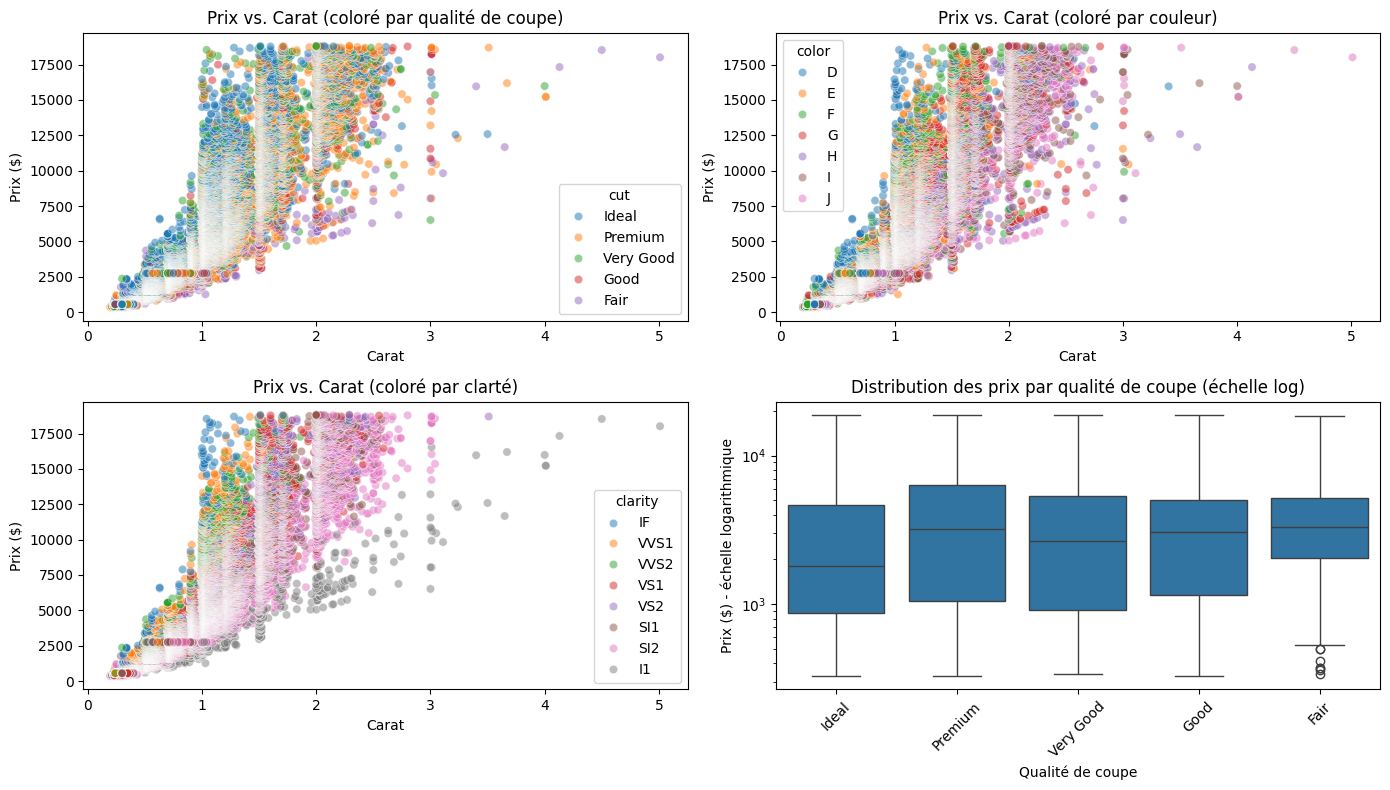

Aperçu du jeu de données diamonds:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

Statistiques descriptives de la colonne 'carat':
count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

Statistiques descriptives de la colonne 'price':
count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64
Histogramme du poids des diaman

In [1]:
 # Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chargement du jeu de données diamonds
# Note: Le jeu de données diamonds est disponible dans seaborn
diamonds = sns.load_dataset('diamonds')

# Affichons les premières lignes pour comprendre la structure des données
print("Aperçu du jeu de données diamonds:")
print(diamonds.head())
print("\nInformations sur le jeu de données:")
print(diamonds.info())
print("\nStatistiques descriptives de la colonne 'carat':")
print(diamonds['carat'].describe())

# 1. Création d'un histogramme simple avec pandas
plt.figure(figsize=(10, 6))
diamonds['carat'].hist()
plt.title('Histogramme du poids des diamants (carats)')
plt.xlabel('Poids (carats)')
plt.ylabel('Fréquence')
plt.grid(False)
plt.show()

# 2. Modification du nombre de bins
plt.figure(figsize=(15, 10))

# Histogramme avec 10 bins
plt.subplot(2, 2, 1)
diamonds['carat'].hist(bins=10, color='skyblue')
plt.title('Histogramme avec 10 bins')
plt.xlabel('Poids (carats)')
plt.ylabel('Fréquence')
plt.grid(False)

# Histogramme avec 30 bins
plt.subplot(2, 2, 2)
diamonds['carat'].hist(bins=30, color='green')
plt.title('Histogramme avec 30 bins')
plt.xlabel('Poids (carats)')
plt.ylabel('Fréquence')
plt.grid(False)

# Histogramme avec 50 bins
plt.subplot(2, 2, 3)
diamonds['carat'].hist(bins=50, color='orange')
plt.title('Histogramme avec 50 bins')
plt.xlabel('Poids (carats)')
plt.ylabel('Fréquence')
plt.grid(False)

# Histogramme avec 100 bins
plt.subplot(2, 2, 4)
diamonds['carat'].hist(bins=100, color='red')
plt.title('Histogramme avec 100 bins')
plt.xlabel('Poids (carats)')
plt.ylabel('Fréquence')
plt.grid(False)

plt.tight_layout()
plt.show()

# 4. Tracer un histogramme avec Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=diamonds, x='carat', kde=True)
plt.title('Histogramme du poids des diamants avec KDE (Seaborn)')
plt.xlabel('Poids (carats)')
plt.ylabel('Fréquence')
plt.grid(False)
plt.show()

# Comparaison entre histogramme pandas et seaborn
plt.figure(figsize=(15, 6))

# Histogramme pandas
plt.subplot(1, 2, 1)
diamonds['carat'].hist(bins=30, color='skyblue')
plt.title('Histogramme avec Pandas')
plt.xlabel('Poids (carats)')
plt.ylabel('Fréquence')
plt.grid(False)

# Histogramme seaborn
plt.subplot(1, 2, 2)
sns.histplot(data=diamonds, x='carat', bins=30, kde=True, color='skyblue')
plt.title('Histogramme avec Seaborn (avec KDE)')
plt.xlabel('Poids (carats)')
plt.ylabel('Fréquence')
plt.grid(False)

plt.tight_layout()
plt.show()

# 6. Visualisation du KDE seul
plt.figure(figsize=(10, 6))
sns.kdeplot(data=diamonds, x='carat', fill=True)
plt.title('Estimation de la densité du noyau (KDE) du poids des diamants')
plt.xlabel('Poids (carats)')
plt.ylabel('Densité')
plt.grid(False)
plt.show()

# 7. Application d'une transformation logarithmique
plt.figure(figsize=(15, 6))

# Histogramme standard
plt.subplot(1, 2, 1)
sns.histplot(data=diamonds, x='carat', kde=True)
plt.title('Histogramme standard')
plt.xlabel('Poids (carats)')
plt.ylabel('Fréquence')
plt.grid(False)

# Histogramme avec transformation logarithmique
plt.subplot(1, 2, 2)
# Ajout d'une petite valeur pour éviter log(0)
sns.histplot(data=diamonds, x='carat', kde=True, log_scale=True)
plt.title('Histogramme avec échelle logarithmique')
plt.xlabel('Poids (carats) - échelle logarithmique')
plt.ylabel('Fréquence')
plt.grid(False)

plt.tight_layout()
plt.show()

# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chargement du jeu de données diamonds
diamonds = sns.load_dataset('diamonds')

# Affichons les premières lignes et statistiques sur les prix
print("Aperçu du jeu de données diamonds:")
print(diamonds.head())
print("\nStatistiques descriptives de la colonne 'price':")
print(diamonds['price'].describe())

# 1. Histogramme simple des prix
plt.figure(figsize=(10, 6))
diamonds['price'].hist(bins=30)
plt.title('Histogramme des prix des diamants')
plt.xlabel('Prix ($)')
plt.ylabel('Fréquence')
plt.grid(False)
plt.show()

# 2. Histogramme des prix avec différents nombres de bins
plt.figure(figsize=(15, 10))

# Histogramme avec 10 bins
plt.subplot(2, 2, 1)
diamonds['price'].hist(bins=10, color='skyblue')
plt.title('Prix des diamants - 10 bins')
plt.xlabel('Prix ($)')
plt.ylabel('Fréquence')
plt.grid(False)

# Histogramme avec 30 bins
plt.subplot(2, 2, 2)
diamonds['price'].hist(bins=30, color='green')
plt.title('Prix des diamants - 30 bins')
plt.xlabel('Prix ($)')
plt.ylabel('Fréquence')
plt.grid(False)

# Histogramme avec 50 bins
plt.subplot(2, 2, 3)
diamonds['price'].hist(bins=50, color='orange')
plt.title('Prix des diamants - 50 bins')
plt.xlabel('Prix ($)')
plt.ylabel('Fréquence')
plt.grid(False)

# Histogramme avec 100 bins
plt.subplot(2, 2, 4)
diamonds['price'].hist(bins=100, color='red')
plt.title('Prix des diamants - 100 bins')
plt.xlabel('Prix ($)')
plt.ylabel('Fréquence')
plt.grid(False)

plt.tight_layout()
plt.show()

# 3. Comparaison entre distribution normale et logarithmique des prix
plt.figure(figsize=(15, 6))

# Histogramme standard
plt.subplot(1, 2, 1)
sns.histplot(data=diamonds, x='price', kde=True, bins=30, color='skyblue')
plt.title('Distribution originale des prix')
plt.xlabel('Prix ($)')
plt.ylabel('Fréquence')
plt.grid(False)

# Histogramme avec transformation logarithmique
plt.subplot(1, 2, 2)
sns.histplot(data=diamonds, x='price', kde=True, bins=30, color='green', log_scale=True)
plt.title('Distribution logarithmique des prix')
plt.xlabel('Prix ($) - échelle logarithmique')
plt.ylabel('Fréquence')
plt.grid(False)

plt.tight_layout()
plt.show()

# 4. Création d'une colonne avec le log des prix pour une analyse plus détaillée
diamonds['log_price'] = np.log(diamonds['price'])

# Histogramme de log_price pour mieux visualiser les pics
plt.figure(figsize=(12, 6))
sns.histplot(data=diamonds, x='log_price', kde=True, bins=50)
plt.title('Distribution du logarithme des prix des diamants')
plt.xlabel('Log(Prix)')
plt.ylabel('Fréquence')
plt.grid(False)

# Ajoutons des lignes verticales pour identifier les pics approximatifs
plt.axvline(x=6.8, color='red', linestyle='--', alpha=0.7, label='Pic 1 (~6.8)')
plt.axvline(x=8.5, color='blue', linestyle='--', alpha=0.7, label='Pic 2 (~8.5)')
plt.axvline(x=9.0, color='green', linestyle='--', alpha=0.7, label='Pic 3 (~9.0)')
plt.legend()
plt.show()

# 5. Conversion des valeurs logarithmiques en prix réels pour meilleure interprétation
log_values = [6.8, 8.5, 9.0]
real_prices = [np.exp(val) for val in log_values]

print("\nPics identifiés sur l'échelle logarithmique et leurs prix correspondants:")
for log_val, real_price in zip(log_values, real_prices):
    print(f"Log(Prix) = {log_val} correspond à Prix = ${real_price:.2f}")

# 6. Analyse des diamants autour des pics identifiés
price_ranges = [
    (np.exp(6.7), np.exp(6.9)),  # Autour du premier pic
    (np.exp(8.4), np.exp(8.6)),  # Autour du deuxième pic
    (np.exp(8.9), np.exp(9.1))   # Autour du troisième pic
]

# Affichons les caractéristiques des diamants autour de chaque pic
for i, (lower, upper) in enumerate(price_ranges):
    print(f"\nCaractéristiques des diamants autour du pic {i+1} (prix entre ${lower:.2f} et ${upper:.2f}):")
    subset = diamonds[(diamonds['price'] >= lower) & (diamonds['price'] <= upper)]
    print(subset[['carat', 'cut', 'color', 'clarity', 'price']].describe().round(2))
    
# 7. Visualisation de la relation entre prix et qualité
plt.figure(figsize=(14, 8))

# Prix vs. carat avec coloration par qualité de coupe
plt.subplot(2, 2, 1)
sns.scatterplot(data=diamonds, x='carat', y='price', hue='cut', alpha=0.5)
plt.title('Prix vs. Carat (coloré par qualité de coupe)')
plt.xlabel('Carat')
plt.ylabel('Prix ($)')

# Prix vs. carat avec coloration par couleur
plt.subplot(2, 2, 2)
sns.scatterplot(data=diamonds, x='carat', y='price', hue='color', alpha=0.5)
plt.title('Prix vs. Carat (coloré par couleur)')
plt.xlabel('Carat')
plt.ylabel('Prix ($)')

# Prix vs. carat avec coloration par clarté
plt.subplot(2, 2, 3)
sns.scatterplot(data=diamonds, x='carat', y='price', hue='clarity', alpha=0.5)
plt.title('Prix vs. Carat (coloré par clarté)')
plt.xlabel('Carat')
plt.ylabel('Prix ($)')

# Boxplot des prix par qualité de coupe (échelle logarithmique)
plt.subplot(2, 2, 4)
sns.boxplot(data=diamonds, x='cut', y='price', log_scale=True)
plt.title('Distribution des prix par qualité de coupe (échelle log)')
plt.xlabel('Qualité de coupe')
plt.ylabel('Prix ($) - échelle logarithmique')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Importation des bibliothèques nécessaires
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Configuration pour afficher les graphiques dans le navigateur si nécessaire
import plotly.io as pio
pio.renderers.default = "browser"  # Commentez cette ligne si vous utilisez un notebook Jupyter

# Chargement du jeu de données diamonds
diamonds = sns.load_dataset('diamonds')

# Affichons les premières lignes et statistiques sur les données
print("Aperçu du jeu de données diamonds:")
print(diamonds.head())
print("\nStatistiques descriptives de la colonne 'carat':")
print(diamonds['carat'].describe())
print("\nStatistiques descriptives de la colonne 'price':")
print(diamonds['price'].describe())

# 1. Histogramme simple des carats avec Plotly - définir mais ne pas afficher immédiatement
fig_carat = px.histogram(diamonds, x="carat", 
                   title='Histogramme du poids des diamants (carats)',
                   labels={'carat': 'Poids (carats)', 'count': 'Fréquence'},
                   opacity=0.7)
fig_carat.update_layout(
    xaxis_title="Poids (carats)",
    yaxis_title="Fréquence",
    template="plotly_white"
)
# Enregistrer la figure au lieu de l'afficher
fig_carat.write_html("histogramme_carat.html")
print("Histogramme du poids des diamants généré dans 'histogramme_carat.html'")

# 2. Modification du nombre de bins pour l'histogramme des carats
fig_bins = make_subplots(rows=2, cols=2, 
                    subplot_titles=['10 bins', '30 bins', '50 bins', '100 bins'])

# Histogramme avec 10 bins
fig_bins.add_trace(
    go.Histogram(x=diamonds['carat'], nbinsx=10, marker_color='skyblue', 
                 name='10 bins', opacity=0.7),
    row=1, col=1
)

# Histogramme avec 30 bins
fig_bins.add_trace(
    go.Histogram(x=diamonds['carat'], nbinsx=30, marker_color='green', 
                 name='30 bins', opacity=0.7),
    row=1, col=2
)

# Histogramme avec 50 bins
fig_bins.add_trace(
    go.Histogram(x=diamonds['carat'], nbinsx=50, marker_color='orange', 
                 name='50 bins', opacity=0.7),
    row=2, col=1
)

# Histogramme avec 100 bins
fig_bins.add_trace(
    go.Histogram(x=diamonds['carat'], nbinsx=100, marker_color='red', 
                 name='100 bins', opacity=0.7),
    row=2, col=2
)

fig_bins.update_layout(
    title_text="Histogrammes du poids des diamants avec différents nombres de bins",
    showlegend=False,
    height=700,
    template="plotly_white"
)

# Mise à jour des axes
for i in range(1, 3):
    for j in range(1, 3):
        fig_bins.update_xaxes(title_text="Poids (carats)", row=i, col=j)
        fig_bins.update_yaxes(title_text="Fréquence", row=i, col=j)

# Enregistrer au lieu d'afficher
fig_bins.write_html("histogramme_bins_comparison.html")
print("Comparaison des bins générée dans 'histogramme_bins_comparison.html'")

# Création des graphiques pour l'analyse des prix
# Histogramme des prix original et logarithmique
fig_prices = make_subplots(rows=1, cols=2, 
                    subplot_titles=['Distribution originale des prix', 'Distribution logarithmique des prix'])

# Histogramme standard des prix
fig_prices.add_trace(
    go.Histogram(x=diamonds['price'], nbinsx=30, marker_color='orange', opacity=0.7),
    row=1, col=1
)

# Histogramme des prix avec échelle logarithmique
fig_prices.add_trace(
    go.Histogram(x=diamonds['price'], nbinsx=30, marker_color='green', opacity=0.7),
    row=1, col=2
)

fig_prices.update_layout(
    title_text="Histogrammes des prix des diamants: normal vs. logarithmique",
    showlegend=False,
    height=500,
    template="plotly_white"
)

fig_prices.update_xaxes(title_text="Prix ($)", row=1, col=1)
fig_prices.update_yaxes(title_text="Fréquence", row=1, col=1)
fig_prices.update_xaxes(title_text="Prix ($)", type="log", row=1, col=2)
fig_prices.update_yaxes(title_text="Fréquence", row=1, col=2)

# Enregistrer au lieu d'afficher
fig_prices.write_html("prix_comparaison.html")
print("Comparaison des prix générée dans 'prix_comparaison.html'")

# Création d'une colonne avec le log des prix pour une analyse plus détaillée
diamonds['log_price'] = np.log(diamonds['price'])

# Histogramme de log_price avec identification des pics
fig_log_prices = px.histogram(diamonds, x="log_price", nbins=50,
                  title="Distribution du logarithme des prix des diamants",
                  labels={'log_price': 'Log(Prix)', 'count': 'Fréquence'},
                  opacity=0.7)

# Ajout de lignes verticales pour marquer les pics
fig_log_prices.add_vline(x=6.8, line_width=2, line_dash="dash", line_color="red")
fig_log_prices.add_vline(x=8.5, line_width=2, line_dash="dash", line_color="blue")
fig_log_prices.add_vline(x=9.0, line_width=2, line_dash="dash", line_color="green")

# Ajouter des annotations pour les pics
fig_log_prices.add_annotation(x=6.8, y=300, text="Pic 1 (~$900)", showarrow=True, arrowhead=1, ax=50, ay=-30)
fig_log_prices.add_annotation(x=8.5, y=300, text="Pic 2 (~$4,900)", showarrow=True, arrowhead=1, ax=-50, ay=-50)
fig_log_prices.add_annotation(x=9.0, y=300, text="Pic 3 (~$8,100)", showarrow=True, arrowhead=1, ax=-50, ay=-70)

fig_log_prices.update_layout(
    xaxis_title="Log(Prix)",
    yaxis_title="Fréquence",
    template="plotly_white"
)

# Enregistrer au lieu d'afficher
fig_log_prices.write_html("log_prix_pics.html")
print("Histogramme du logarithme des prix généré dans 'log_prix_pics.html'")

# Calcul des prix réels correspondant aux pics logarithmiques
log_values = [6.8, 8.5, 9.0]
real_prices = [np.exp(val) for val in log_values]

print("\nPics identifiés sur l'échelle logarithmique et leurs prix correspondants:")
for log_val, real_price in zip(log_values, real_prices):
    print(f"Log(Prix) = {log_val} correspond à Prix = ${real_price:.2f}")

# Enregistrement d'un graphique interactif pour l'analyse des relations
fig_scatter = px.scatter(diamonds, x="carat", y="price", color="clarity", 
                 hover_data=["cut", "color", "depth", "table"],
                 title="Prix vs. Carat (coloré par clarté)",
                 labels={"carat": "Poids (carats)", "price": "Prix ($)", 
                        "clarity": "Clarté", "cut": "Coupe", "color": "Couleur"},
                 opacity=0.6)

# Option pour exporter un graphique avec contrôles interactifs
fig_scatter.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.1,
            y=1.15,
            buttons=list([
                dict(label="Échelle normale",
                     method="relayout",
                     args=[{"xaxis.type": "linear", "yaxis.type": "linear"}]),
                dict(label="Y log",
                     method="relayout",
                     args=[{"xaxis.type": "linear", "yaxis.type": "log"}]),
            ]),
        )
    ],
    template="plotly_white"
)

fig_scatter.write_html("prix_vs_carat.html")
print("Graphique interactif Prix vs Carat généré dans 'prix_vs_carat.html'")

print("\nTous les graphiques ont été générés avec succès sous forme de fichiers HTML.")
print("Vous pouvez ouvrir ces fichiers dans votre navigateur pour visualiser les graphiques interactifs.")

3. Comment l'augmentation du nombre de classes (bins) affecte-t-elle l'apparence de l'histogramme ?
Lorsqu'on augmente le nombre de bins dans un histogramme :

Avec peu de bins (ex. 10), l'histogramme montre une vision générale de la distribution mais manque de détails, ce qui peut masquer certaines nuances importantes
Avec plus de bins (ex. 50-100), l'histogramme révèle davantage de détails sur la distribution, permettant de voir des pics plus précis et des tendances fines
Trop de bins peut toutefois rendre l'histogramme "bruité" et difficile à interpréter car chaque bin contient moins d'observations
Le choix optimal du nombre de bins dépend de la taille de l'échantillon et de l'objectif de l'analyse

5. Quelles sont les deux différences clés entre les histogrammes générés par la fonction .hist() de pandas et la fonction sns.histplot() de Seaborn ?
Différences principales :

Esthétique et style : Seaborn produit des visualisations plus esthétiques avec un style par défaut plus élaboré et moderne, tandis que pandas offre une représentation plus simple et fonctionnelle
Fonctionnalités intégrées : Seaborn propose automatiquement des options avancées comme l'ajout de la courbe KDE (estimation de densité), facilitant l'interprétation de la distribution sous-jacente des données

6. Qu'est-ce qu'une estimation de la densité du noyau (KDE) ? Que montre-t-elle ?
L'estimation de la densité du noyau (KDE) est une méthode statistique qui :

Crée une courbe lisse représentant la distribution de probabilité des données
Utilise de petites fonctions de noyau (souvent gaussiennes) centrées sur chaque point de données
Additionne ces fonctions pour produire une courbe continue de densité
Permet de visualiser la forme globale de la distribution sans les "marches d'escalier" d'un histogramme
Aide à identifier des caractéristiques comme la multimodalité (plusieurs pics) que les histogrammes peuvent parfois masquer
Facilite la comparaison entre distributions

La courbe KDE montre où les valeurs sont concentrées et comment elles sont réparties sur l'ensemble de données, offrant une représentation plus lisse que l'histogramme traditionnel.

Pourquoi une transformation logarithmique est-elle appliquée à la variable 'price' ?
La transformation logarithmique est appliquée aux prix des diamants pour plusieurs raisons importantes :

Correction de l'asymétrie : La distribution originale des prix est fortement asymétrique (skewed) vers la droite, avec de nombreux diamants à prix relativement bas et quelques-uns à prix très élevés
Normalisation de la distribution : La transformation logarithmique "étire" la partie basse et "comprime" la partie haute de la distribution, rendant la répartition plus symétrique
Mise en évidence de structures cachées : L'échelle logarithmique permet de révéler des motifs et regroupements qui sont difficilement visibles dans l'échelle originale
Linéarisation des relations : Dans l'analyse de diamants, les relations entre variables comme le carat et le prix deviennent souvent plus linéaires après transformation logarithmique

Quelles nouvelles informations l'histogramme transformé par logarithme révèle-t-il sur la distribution des prix des diamants ?
L'histogramme transformé révèle des informations cruciales :

Structure multimodale : Au lieu d'une distribution simplement asymétrique, nous voyons clairement des pics distincts à différents niveaux de prix
Segmentation naturelle du marché : Ces pics suggèrent l'existence de segments de marché distincts plutôt qu'un continuum de prix
Granularité des prix : Des concentrations à certains niveaux de prix indiquent des points de tarification préférentiels ou des seuils psychologiques dans le marché
Variations plus fines : La transformation permet de mieux distinguer les variations dans les gammes de prix inférieures, qui étaient compressées dans l'histogramme original

Identifiez les pics approximatifs dans la distribution des prix transformée par logarithme. Que pourraient suggérer ces pics sur le marché des diamants ?
Les pics identifiés dans la distribution logarithmique se situent approximativement à :

Premier pic (log ~6.8) : Correspond à environ $900

Représente probablement le segment des diamants d'entrée de gamme
Diamants plus petits et/ou de qualité moyenne
Segment de marché grand public pour bijoux courants


Deuxième pic (log ~8.5) : Correspond à environ $4,900

Représente le segment moyen-supérieur
Diamants de meilleure qualité ou de taille plus importante
Probablement destinés à des occasions spéciales comme les fiançailles


Troisième pic (log ~9.0) : Correspond à environ $8,100

Représente le segment haut de gamme
Diamants de qualité supérieure ou de taille importante
Marché de luxe et d'investissement



Ces pics pourraient indiquer :

Des stratégies de tarification distinctes par les revendeurs
Des seuils psychologiques d'achat pour les consommateurs
Des catégories naturelles basées sur la combinaison de caractéristiques (taille, clarté, couleur, coupe)
Une segmentation du marché des diamants par niveau de qualité et utilisation prévue

La visualisation logarithmique révèle ainsi la structure complexe du marché des diamants qui était masquée dans l'histogramme original des prix.


Ce notebook offre une introduction pratique à la bibliothèque pandas en Python. Il couvre les concepts fondamentaux de la manipulation et de l'analyse de données à l'aide de pandas, incluant le chargement de données, l'exploration et les statistiques descriptives. Nous utiliserons un jeu de données sur les diamants pour illustrer ces fonctionnalités essentielles.

<hr style="border: 2px solid black;">

## step 1: Download the data : 
The datasets used here can be found in https://github.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/tree/master/datasets.

documentation on pandas can be found here: https://pandas.pydata.org/docs/
seaborn documentation can be found here: https://seaborn.pydata.org/

<hr style="border: 2px solid black;">

## Step 2: Import needed libraries



In [5]:
# import pandas libraries and visualization library seeborn
import pandas as pd
import seaborn as sns

<hr style="border: 2px solid black;">

## Step 3  Describing data with pandas : 

<hr style="border: 2px solid black;">

La bibliothèque pandas est un outil open source extrêmement puissant pour gérer, manipuler et analyser des données structurées. Les tableaux de données peuvent être stockés dans l'objet DataFrame disponible dans pandas, et des données dans divers formats (par exemple, .csv, .tsv, .xlsx, et .json) peuvent être lues directement dans un DataFrame. En utilisant des fonctions intégrées, les DataFrames peuvent être manipulés efficacement (par exemple, convertir des tableaux entre différentes vues, comme longues/larges ; regrouper par une colonne/caractéristique spécifique ; résumer les données ; et plus encore).

In [6]:
# you can either read the data directly from github or you can download it and 
# include its path, the dataset is also available in seaborn which means 
# you can read it via: diamonds_df = sns.load_dataset('diamonds')

#URL of the dataset: Download the dataset 
#diamonds_url = "./diamonds.csv"
#diamonds_df = pd.read_csv(diamonds_url)
#diamonds_df

diamonds_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/diamonds.csv"
diamonds_df = pd.read_csv(diamonds_url)
diamonds_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### 3.1 Observing and Describing Data

Pour observer et décrire les données d'un dataset en utilisant pandas , une méthode très utile est la fonction head(). Cette fonction permet d'afficher les premières lignes du DataFrame, ce qui est pratique pour avoir un aperçu rapide des données. Par défaut, elle affiche 5 lignes. Pour ajuster cela, nous pouvons utiliser l'argument n ; par exemple, head(n=5). Voici quelques points clés à retenir :

In [6]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
diamonds_df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


<font color="#008000">  **Pourriez-vous spécifier les différents types de données dans toutes les colonnes ?** <\font> 

Les données contiennent différentes caractéristiques des diamants, telles que **carat** , **cut quality** , **color**, et **price** , sous forme de colonnes. Maintenant, **cut** , **clarity** , et **color** sont des variables catégorielles, tandis que x , y , z , depth , table , et price sont des variables continues. Alors que les variables catégorielles prennent des catégories/noms uniques comme valeurs, les variables continues prennent des nombres réels comme valeurs.

cut , color , et clarity sont des variables ordinales avec respectivement 5, 7 et 8 valeurs uniques (cela peut être obtenu en utilisant diamonds_df.cut.nunique() , diamonds_df.color.nunique() , diamonds_df.clarity.nunique() – essayez !). cut représente la qualité de la taille, décrite comme Fair (Passable), Good (Bon), Very Good (Très bon), Premium (Premium), ou Ideal (Idéal) ; color décrit la couleur du diamant de J (pire) à D (meilleur). Il y a aussi clarity , qui mesure la clarté du diamant – les degrés vont de I1 (pire), SI1, SI2, VS1, VS2, VVS1, VVS2, à IF (meilleur).

<font color="#008000">  **Comptez le nombre de lignes et de colonnes dans le DataFrame en utilisant la fonction**

In [15]:
diamonds_df.shape

(53940, 10)

Résumez les colonnes en utilisant describe() pour obtenir la distribution des variables, incluant la moyenne, la médiane, le minimum, le maximum et les différents quartiles :

In [9]:
# the describe function as is will only describe numeric values 
# to include categorical use diamonds_df.describe(include=object)
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
diamonds_df.describe(include=object)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


<font color="#008000"> **Sélectionner des colonnes d'un DataFrame. **</font>


Pour sélectionner des colonnes spécifiques d'un jeu de données (DataFrame) Pandas, deux méthodes principales sont disponibles : l'opérateur point (`.`) et l'opérateur crochets (`[]`).

**Accès simple :**

Par exemple, pour accéder à la colonne nommée `cut` du DataFrame `diamonds_df`, vous pouvez utiliser :

```python
diamonds_df.cut

# ou 
diamonds_df['cut']
```

Cas où l'opérateur point (.) ne peut pas être utilisé :

L'opérateur point est pratique, mais il présente des limitations dans certains cas :

Noms de colonnes contenant des espaces : Si un nom de colonne inclut des espaces (par exemple, 'prix au carat'), vous devez impérativement utiliser la notation avec les crochets :

```python
diamonds_df['prix au carat']
```

Noms de colonnes entiers : Lorsque le nom d'une colonne est un nombre entier (par exemple, 2023), l'accès via l'opérateur point n'est pas valide. Utilisez les crochets :

```python
diamonds_df[2023]
```

Création de nouvelles colonnes : Pour ajouter une nouvelle colonne au DataFrame, la notation avec les crochets est la méthode standard :

```python
diamonds_df['nouvelle_colonne'] = ...
diamonds_df['une autre colonne'] = ...
```



Maintenant, nous allons examiner l'ajout conditionnel de colonnes. Essayons d'ajouter une colonne basée sur la valeur de `price_per_carat`. Disons que toute valeur supérieure à 3500 sera considérée comme "élevée" (codée par 1) et toute valeur inférieure à 3500 sera considérée comme "faible" (codée par 0).

In [16]:
#Operations on Dataframes: 

import numpy as np
diamonds_df['price_per_carat'] = diamonds_df['price']/diamonds_df['carat']

np.where(diamonds_df['price_per_carat']>3500,1,0)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat_is_high,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161,1080.645161


<hr style="border: 2px solid black;">


 ##                         Exercice de laboratoire : Tracer et analyser un histogramme


**Objectif** : Dans cet exercice, vous allez créer et analyser des histogrammes pour comprendre la distribution du poids en carats dans le jeu de données des diamants.

**Matplotlib**
- est une bibliothèque de traçage (plotting) disponible dans la plupart des distributions Python et constitue la base de plusieurs packages de traçage.
- matplotlib compris la fonctionnalité de traçage intégrée de pandas et seaborn. 
- Matplotlib permet de contrôler chaque aspect d'une figure et est connu pour être verbeux. Les fonctions de visualisation de seaborn et pandas sont toutes deux construites sur matplotlib. 


**Pandas**
pandas est une bibliothèque puissante d'analyse et de manipulation de données. Elle fournit des structures de données comme le DataFrame, qui est essentiel pour travailler avec des données structurées. L'outil de traçage intégré de pandas est un outil exploratoire utile pour générer des figures qui ne sont pas prêtes pour une présentation finale mais utiles pour comprendre l'ensemble de données sur lequel vous travaillez. 


**Seaborn**
- Seaborn, possède des API pour dessiner une grande variété de tracés esthétiquement agréables.seaborn est une bibliothèque de visualisation de données Python basée sur Matplotlib. Elle fournit une interface de haut niveau pour1 créer des graphiques statistiques attrayants et informatifs



**Pour illustrer certains concepts clés et explorer l'ensemble de données diamonds, nous commencerons par deux visualisations simples dans ce chapitre : les histogrammes et les diagrammes à barres.**

1. Pour cet exercice, créez un histogramme de la fréquence des diamants dans le jeu de données, en utilisant leurs spécifications de carat respectives sur l'axe des x
2.  Modifier le nombre de bins :
3. Comment l'augmentation du nombre de classes affecte-t-elle l'apparence de l'histogramme ?
4. Tracer un histogramme à l'aide de Seaborn :
5. Quelles sont les deux différences clés entre les histogrammes générés par la fonction .hist() de pandas et la fonction sns.distplot() de Seaborn ?
6. Qu'est-ce qu'une estimation de la densité du noyau (KDE) ? Que montre-t-elle ?
7. Appliquer une transformation logarithmique :



<hr style="border: 2px solid black;">


array([[<Axes: title={'center': 'carat'}>]], dtype=object)

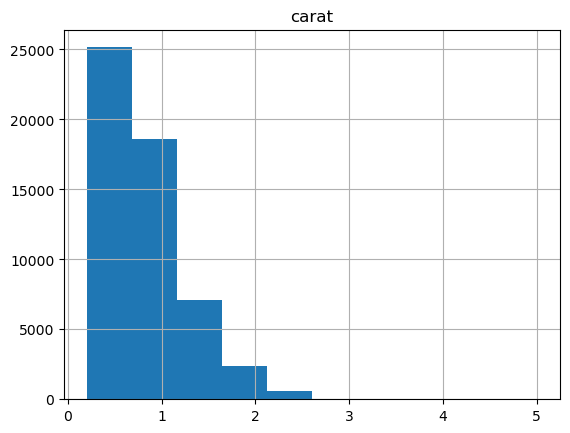

In [3]:
import seaborn as sns
import pandas as pd
diamonds_df = sns.load_dataset('diamonds')
diamonds_df.hist(column='carat')

array([[<Axes: title={'center': 'carat'}>]], dtype=object)

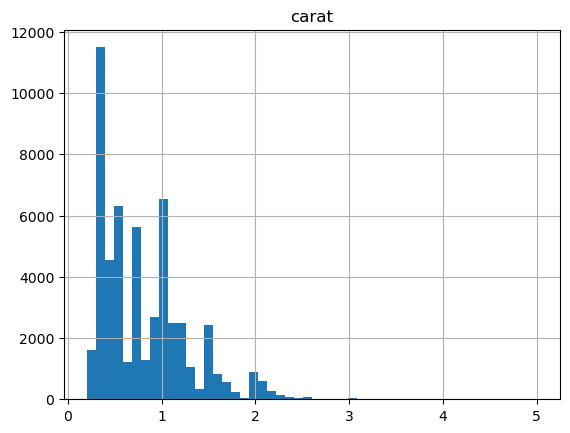

In [4]:
diamonds_df.hist(column='carat', bins=50)

L'augmentation du nombre de classes rend l'histogramme plus détaillé ou granulaire. Il montre davantage de fluctuations et de motifs plus fins dans la distribution des données.

/tmp/ipykernel_8922/3066889642.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds_df.carat)


<Axes: xlabel='carat', ylabel='Density'>

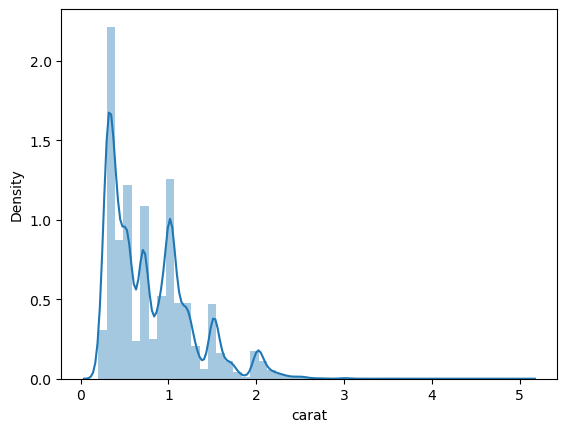

In [6]:
sns.distplot(diamonds_df.carat)


/tmp/ipykernel_8922/1232205780.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds_df.carat, kde=False)


<Axes: xlabel='carat'>

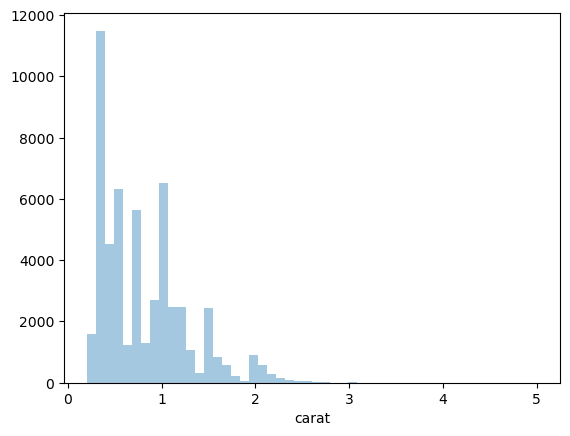

In [7]:
sns.distplot(diamonds_df.carat, kde=False)


/tmp/ipykernel_8922/1046684659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamonds_df.carat, kde=False, bins=100)


<Axes: xlabel='carat'>

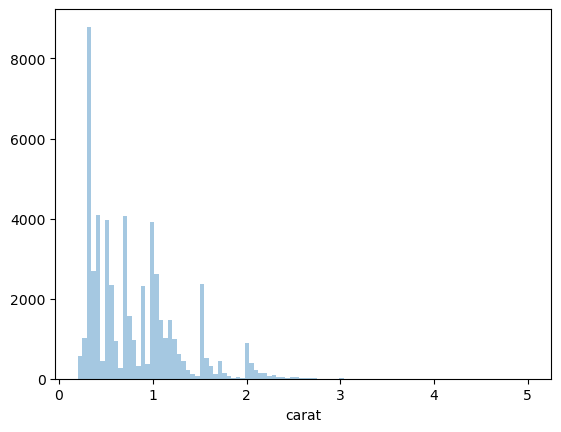

In [8]:
sns.distplot(diamonds_df.carat, kde=False, bins=100)


/tmp/ipykernel_8922/1859211707.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(diamonds_df.price), kde=True)


<Axes: xlabel='price', ylabel='Density'>

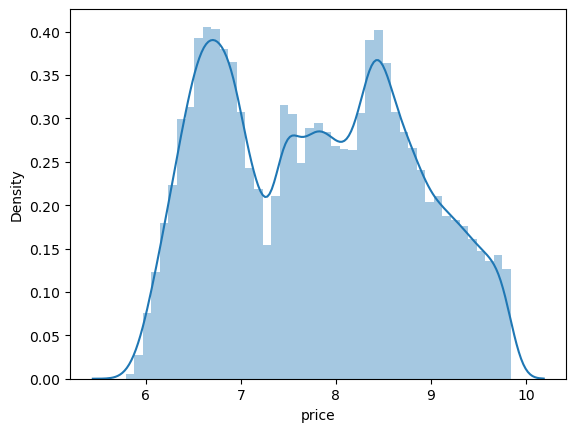

In [10]:
import numpy as np
sns.distplot(np.log(diamonds_df.price), kde=True)

<hr style="border: 2px solid black;">


- **Pourquoi une transformation logarithmique est-elle appliquée à la variable 'price' ?**
Une transformation logarithmique est souvent appliquée aux données asymétriques comme 'price' pour rendre la distribution plus symétrique et plus facile à analyser. Elle peut également aider à révéler des motifs qui ne sont pas apparents à l'échelle d'origine.
- **Quelles nouvelles informations l'histogramme transformé par logarithme révèle-t-il sur la distribution des prix des diamants ?**
L'histogramme transformé par logarithme révèle des pics distincts, suggérant des regroupements ou des catégories de prix potentiels pour les diamants. Cela pourrait indiquer différents segments de marché ou niveaux de qualité.
- **Identifiez les pics approximatifs dans la distribution des prix transformée par logarithme. Que pourraient suggérer ces pics sur le marché des diamants ?**
Le texte mentionne des concentration/groupment autour de 6,8 et entre 8,5 et 9 (sur l'échelle logarithmique). Ces groupment pourraient suggérer : Un group représente des diamants plus courants et moins chers. Un autre group représente un groupe de diamants plus chers, peut-être de meilleure qualité.

**Analyse et discussion :**

Sur la base de vos observations des histogrammes, répondez aux questions suivantes :

**Quelles sont les trois principales caractéristiques d'une distribution qui peuvent être identifiées à partir d'un histogramme ?**
- Forme : Asymétrie (symétrie), modalité (nombre de group) et forme générale.
- Centre : Où les données sont concentrées (par exemple, moyenne, médiane).
- Dispersion : Dans quelle mesure les données varient (par exemple, étendue, écart type).

**Expliquez comment le choix de la taille des bins peut influencer l'interprétation d'un histogramme.**
- Trop peu de bins peuvent simplifier excessivement les données, masquant des motifs importants. 
- Trop de classes peuvent rendre l'histogramme bruité et difficile à interpréter. La bonne taille de classe révèle la distribution sous-jacente.


<hr style="border: 2px solid black;">


<center> <h1> **Repeat the visualizations but with plotly**

<table>
<tr>
    <td><img src="./images/pandas.png" alt="Pandas Logo" width="400"/></td>
    <td><img src="./images/Plotly-logo.png" alt="plotly Logo" width="400"/></td>
</tr>
</table>